# BugBase summary statistics and plots

In [2]:
require(ggplot2)
require(reshape2)
require(multcomp)

Loading required package: ggplot2
Loading required package: reshape2
Loading required package: multcomp
Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Loading required package: MASS

Attaching package: ‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser



## Loading data

In [3]:
bugbase <- read.table('../bugbase/bugbase_results/predicted_phenotypes/predictions.txt',
                      header=TRUE,
                      sep='\t',
                      row.names=1)
md <- read.table('../metadata/5per_10k.2.18.19.short.txt', header=TRUE, row.names=1, sep='\t', quote='')

outdir = '../bugbase/plots'
dir.create(outdir, showWarnings = FALSE)

In [4]:
bug_md <- merge(x = md, y = bugbase, by="row.names")

## Plot by host category

In [5]:
bug_md_melt <- melt(bug_md[c('Row.names',
                             'Taxonomy_Class',
                             'Taxonomy_Order',
                             'Taxonomy_Family',
                             'Taxonomy_Genus',
                             'Taxonomy_Species',
                             'flight_status',
                             'Aerobic',
                             'Anaerobic',
                             'Contains_Mobile_Elements',
                             'Facultatively_Anaerobic',
                             'Forms_Biofilms',
                             'Gram_Negative',
                             'Gram_Positive',
                             'Potentially_Pathogenic',
                             'Stress_Tolerant')],
                    id.vars=c('Row.names',
                             'Taxonomy_Class',
                             'Taxonomy_Order',
                             'Taxonomy_Family',
                             'Taxonomy_Genus',
                             'Taxonomy_Species',
                             'flight_status'))

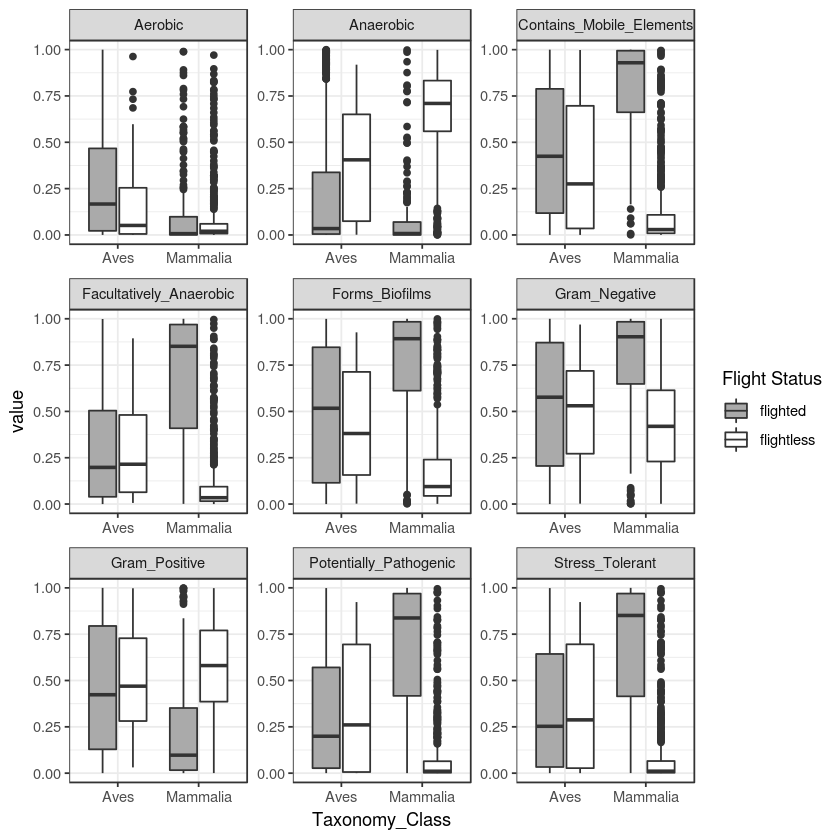

In [6]:
bug_md_melt <- subset(bug_md_melt, Taxonomy_Class %in% c('Mammalia', 'Aves'))


bug_boxplot_mam_bird <- ggplot(bug_md_melt,
       aes(x = Taxonomy_Class, y = value, fill = flight_status)) + 
  geom_boxplot() + 
  facet_wrap(~ variable, 
             scale='free') +
  scale_fill_manual(values = c('flighted' = '#AAAAAA',
                               'flightless' = '#FFFFFF'),
                     name = 'Flight Status') +
  theme_bw()

ggsave(bug_boxplot_mam_bird, 
       filename = file.path(outdir,'bugbase_boxplots_birds_mams_flight.png'), 
       width=8,
       height=6)

bug_boxplot_mam_bird

In [7]:
bug_md$Taxonomy_Class_bats <- bug_md$Taxonomy_Class

levels(bug_md$Taxonomy_Class_bats) <- c(levels(bug_md$Taxonomy_Class_bats), 'Bats')
levels(bug_md$Taxonomy_Class_bats) <- c(levels(bug_md$Taxonomy_Class_bats), 'Flightless birds')

bug_md[bug_md$Taxonomy_Order == 'Chiroptera', 'Taxonomy_Class_bats'] <- 'Bats'
bug_md[(bug_md$flight_status == 'flightless') &
       (bug_md$Taxonomy_Class == 'Aves'), 'Taxonomy_Class_bats'] <- 'Flightless birds'

In [8]:
bug_md_bm <- subset(bug_md, Taxonomy_Class %in% c("Aves", "Mammalia"))



In [9]:
aov_anaerobic <- aov(Anaerobic ~ Taxonomy_Class_bats, data=bug_md_bm)

summary(glht(aov_anaerobic, linfct = mcp(Taxonomy_Class_bats = "Tukey")))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = Anaerobic ~ Taxonomy_Class_bats, data = bug_md_bm)

Linear Hypotheses:
                                 Estimate Std. Error t value Pr(>|t|)    
Mammalia - Aves == 0              0.44154    0.01479  29.859  < 1e-04 ***
Bats - Aves == 0                 -0.12246    0.02174  -5.633  < 1e-04 ***
Flightless birds - Aves == 0      0.18105    0.04895   3.699 0.000953 ***
Bats - Mammalia == 0             -0.56400    0.02250 -25.067  < 1e-04 ***
Flightless birds - Mammalia == 0 -0.26049    0.04929  -5.285  < 1e-04 ***
Flightless birds - Bats == 0      0.30351    0.05180   5.859  < 1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [10]:
aov_fac_anaerobic <- aov(Facultatively_Anaerobic ~ Taxonomy_Class_bats, data=bug_md_bm)

summary(glht(aov_fac_anaerobic, linfct = mcp(Taxonomy_Class_bats = "Tukey")))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = Facultatively_Anaerobic ~ Taxonomy_Class_bats, 
    data = bug_md_bm)

Linear Hypotheses:
                                 Estimate Std. Error t value Pr(>|t|)    
Mammalia - Aves == 0             -0.21061    0.01453 -14.498  < 1e-05 ***
Bats - Aves == 0                  0.37596    0.02136  17.602  < 1e-05 ***
Flightless birds - Aves == 0     -0.01402    0.04808  -0.291 0.990368    
Bats - Mammalia == 0              0.58657    0.02210  26.537  < 1e-05 ***
Flightless birds - Mammalia == 0  0.19659    0.04842   4.060 0.000205 ***
Flightless birds - Bats == 0     -0.38998    0.05089  -7.663  < 1e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [11]:
aov_pot_pathogen <- aov(Potentially_Pathogenic ~ Taxonomy_Class_bats, data=bug_md_bm)

summary(glht(aov_pot_pathogen, linfct = mcp(Taxonomy_Class_bats = "Tukey")))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = Potentially_Pathogenic ~ Taxonomy_Class_bats, data = bug_md_bm)

Linear Hypotheses:
                                 Estimate Std. Error t value Pr(>|t|)    
Mammalia - Aves == 0             -0.23407    0.01508 -15.522   <1e-05 ***
Bats - Aves == 0                  0.36429    0.02217  16.430   <1e-05 ***
Flightless birds - Aves == 0      0.03349    0.04992   0.671    0.899    
Bats - Mammalia == 0              0.59836    0.02295  26.078   <1e-05 ***
Flightless birds - Mammalia == 0  0.26756    0.05026   5.323   <1e-05 ***
Flightless birds - Bats == 0     -0.33080    0.05283  -6.262   <1e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)
